In [1]:
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean

/home/albert/anaconda2/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [6]:
#load data
dir='/mnt/albert/equipes/meom/workdir/albert/NACHOS12.L75/NACHOS12.L75-MAA13-MEAN/1d/2013/'
fileEKE=dir+'NACHOS12.L75-MAA13_y2013.1d_EKE.nc'
dsEKE=xr.open_dataset(fileEKE)
eke=dsEKE.voeke[0,0]
lat=dsEKE.nav_lat
lon=dsEKE.nav_lon



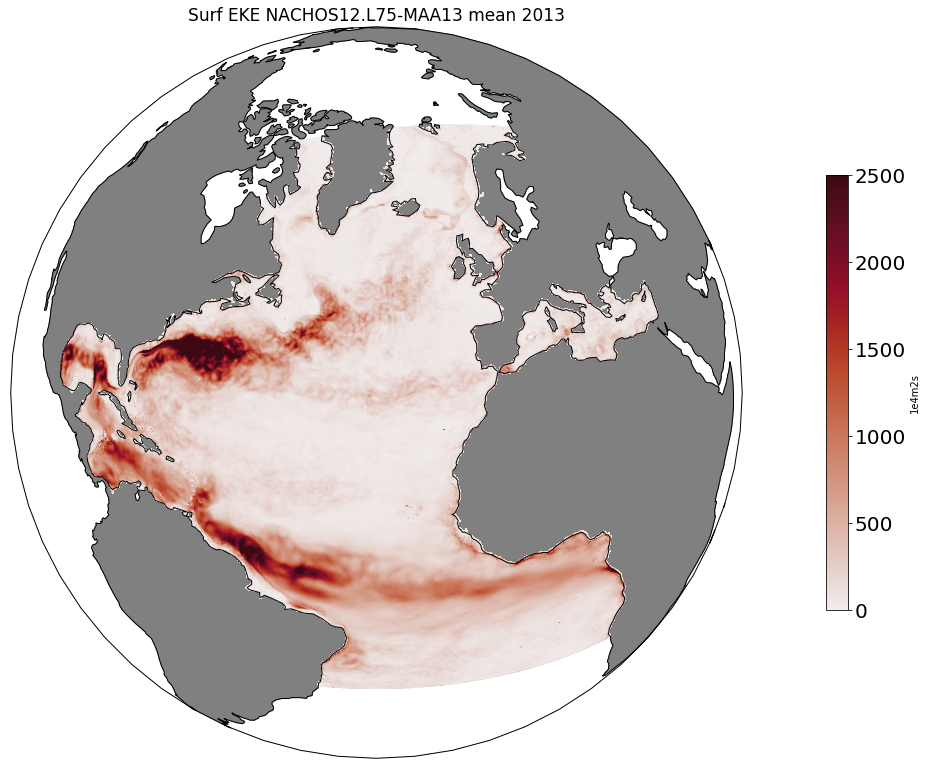

In [8]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection=ccrs.Orthographic(central_longitude=-30,
                                                    central_latitude=35))
cmap = plt.get_cmap(cmocean.cm.amp)
cmap.set_under(color='grey')
pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(10000*eke),transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=2500)
ax.set_global()
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
cbar=plt.colorbar(pcolor,orientation='vertical',fraction=0.026,pad=0.1,label='1e4m2s')
cbar.ax.tick_params(labelsize=20)
ax.set_title('Surf EKE NACHOS12.L75-MAA13 mean 2013',size=17)
plt.savefig('demo_ortho.png')